## Exploratory Data Analysis

In [1]:
# load data
import pandas as pd
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

In [2]:
train_data.shape

(1460, 81)

In [3]:
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
# drop 'Id' columns
train_data = train_data.drop('Id', axis = 1)
test_data = test_data.drop('Id', axis = 1)

In [5]:
# take a look at the target

import seaborn as sns
import matplotlib.pyplot as plt

# set up plot figure
f, ax = plt.subplots(figsize = (11, 9))

sns.distplot(train_data['SalePrice'])

In [6]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

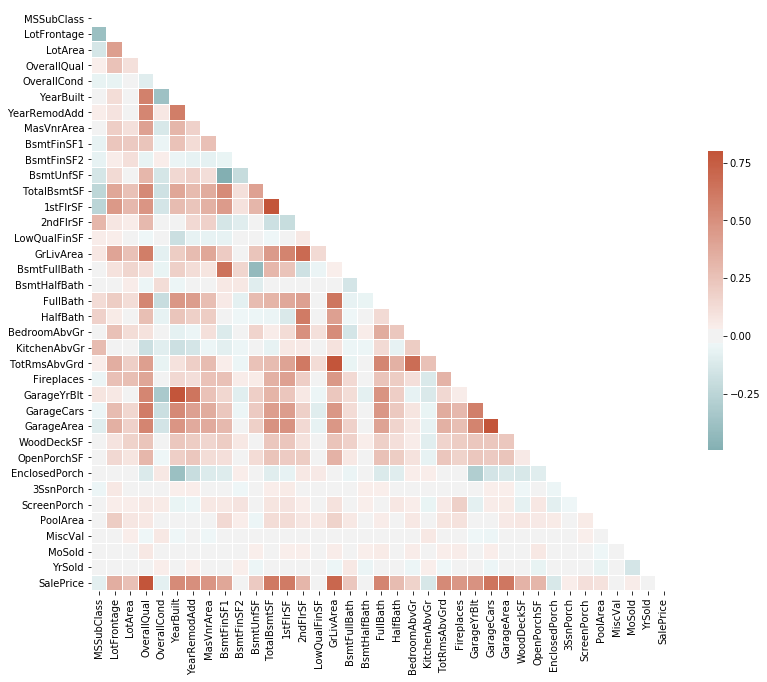

In [7]:
import numpy as np

corr = train_data.corr()

# generate mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up plt figure
f, ax = plt.subplots(figsize = (13, 11))

# generate a custom divergin colormap
cmap = sns.diverging_palette(200, 20, as_cmap=True)

# draw heatmap with mask and correct aspect ratiot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
           square=True, linewidths=.01, cbar_kws={"shrink": .5})

#save fig
f.savefig('../figures/heatfig.png', dpi=800, bbox_inches="tight")

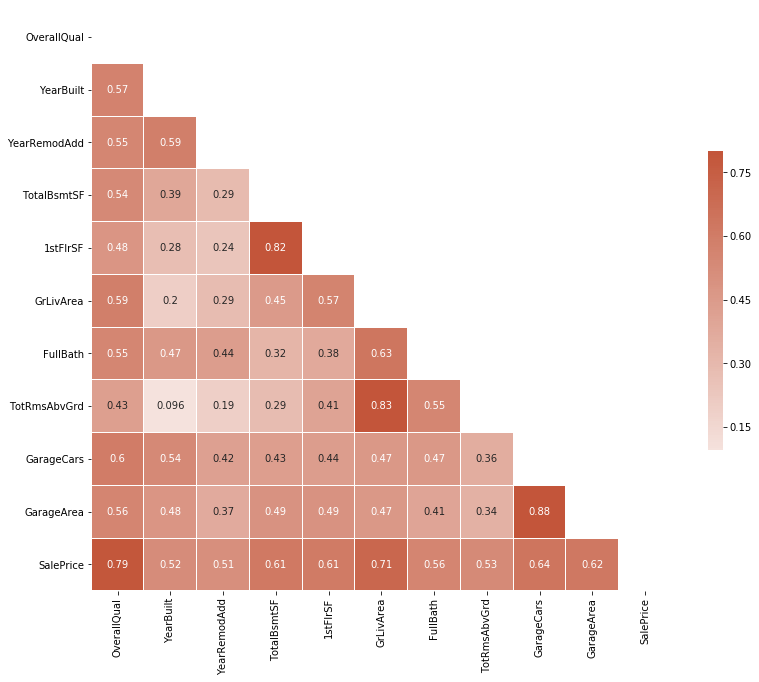

In [8]:
# create corr df with only high correlations
corr_sig = corr[abs(corr['SalePrice']) > .5]
# remove columns that aren't in row index
corr_sig = corr_sig[corr_sig.index]

# generate mask for upper triangle
mask = np.zeros_like(corr_sig, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up plt figure
f, ax = plt.subplots(figsize = (13, 11))

# generate a custom divergin colormap
cmap = sns.diverging_palette(200, 20, as_cmap=True)

# draw heatmap with mask and correct aspect ratiot
sns.heatmap(corr_sig, mask=mask, cmap=cmap, vmax=.8, center=0,
           square=True, linewidths=.01, cbar_kws={"shrink": .5},
           annot=True, annot_kws={'size': 10})

`OverallQual` (Overall Qualitity) has the highest correlation with `SalePrice`, which makes sense since this is a measure of the oerall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent).

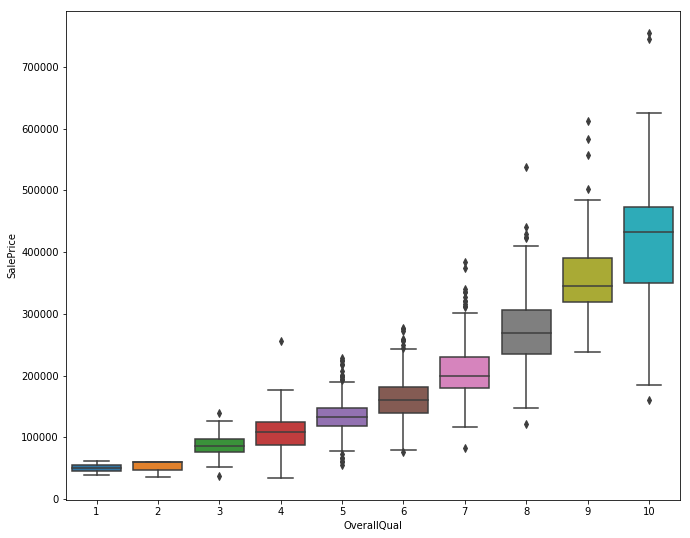

In [9]:
# set up plot figure
f, ax = plt.subplots(figsize = (11, 9))

# create boxplot
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train_data)

# save figure
f.savefig('../figures/OverallQual_boxplot.png', dpi=800, bbox_inches="tight")

`GrLivArea`, which is the "Above Grade (Ground) Living Area Sqaure Feet" has the second highest correlation to `SalePrice`. The logical check makes sense since bigger houses normally cost more than smaller ones.

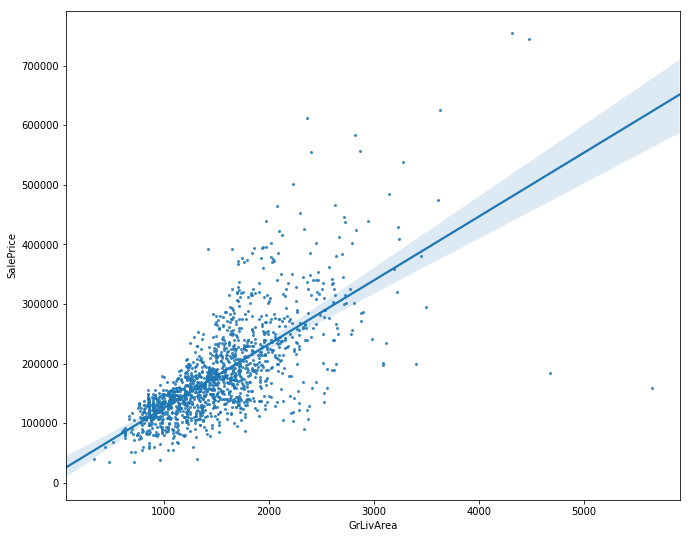

In [10]:
# set up plot figure
f, ax = plt.subplots(figsize = (11, 9))

# create regression plot
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = train_data, scatter_kws = {'s': 4})

There are two houses with high `GrLivArea` values that seem to be sold under normal value. Could possibly be outliers and candidates for removal. Let's compare these values with `OverallQual` to see if its an data entry error.

In [11]:
train_data[train_data['GrLivArea'] > 4500][['SalePrice','GrLivArea', 'OverallQual']]

,SalePrice,GrLivArea,OverallQual
523,184750,4676,10
1298,160000,5642,10


## Preprocessing Data

### Missing Data

In [12]:
# combine data
df = pd.concat([train_data, test_data], sort=False, ignore_index = True)

In [13]:
df.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [14]:
# function to check and sort missing data
def check_missing(data):
    x = [(i,v) for i, v in data.isnull().sum().items() if v>0]
    x.sort(key = lambda x:x[1], reverse = True)
    return x

In [15]:
# check which columns have missing data
check_missing(df)

[('PoolQC', 2909),
 ('MiscFeature', 2814),
 ('Alley', 2721),
 ('Fence', 2348),
 ('SalePrice', 1459),
 ('FireplaceQu', 1420),
 ('LotFrontage', 486),
 ('GarageYrBlt', 159),
 ('GarageFinish', 159),
 ('GarageQual', 159),
 ('GarageCond', 159),
 ('GarageType', 157),
 ('BsmtCond', 82),
 ('BsmtExposure', 82),
 ('BsmtQual', 81),
 ('BsmtFinType2', 80),
 ('BsmtFinType1', 79),
 ('MasVnrType', 24),
 ('MasVnrArea', 23),
 ('MSZoning', 4),
 ('Utilities', 2),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('Functional', 2),
 ('Exterior1st', 1),
 ('Exterior2nd', 1),
 ('BsmtFinSF1', 1),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('Electrical', 1),
 ('KitchenQual', 1),
 ('GarageCars', 1),
 ('GarageArea', 1),
 ('SaleType', 1)]

In [16]:
print('There are', len(check_missing(df)), 'missing columns')

There are 35 missing columns


### Imputing missing data / Encoding

In this section, I will be going through extensive detail into each column with missing data starting with the the feature with the most missing values down to the least.

#### `PoolQC`

The `PoolQC` has the most missing values.

Data Description:

`Ex   Excellent
Gd   Good
TA   Average/Typical
Fa   Fair
NA   No Pool`


Since most houses don't have pools it makes sense that count of missing data in this feature is high. However, it's a good idea to check if all `PoolQC` 0 values with `PoolArea` to make sure those houses truly don't have pools. I also use `OverallQual` to impute the data.

In [17]:
# crosscheck
df[(df['PoolArea'] > 0) & (df['PoolQC'].isnull())][['PoolArea', 'PoolQC', 'OverallQual']]

,PoolArea,PoolQC,OverallQual
2420,368,NaN,4
2503,444,NaN,6
2599,561,NaN,3


In [18]:
pd.crosstab(df['PoolQC'], df['OverallQual'])

OverallQual,6,7,8,10
PoolQC,,,,
Ex,0,0,2,2
Fa,1,1,0,0
Gd,2,1,0,1


In [19]:
# impute
df.loc[[2420,2503,2599], 'PoolQC'] = ['Fa', 'Gd', 'Fa']

The values also seem ***ordinal*** which we can use to encode the data.

In [20]:
# encode

# there are multiple features with these values: create dictionary

qual_enc = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0}
df['PoolQC'] = df['PoolQC'].replace(qual_enc)

While this variable seems ordinal from its description, plotting the bar plot shows its error bars overlap and is inconclusive to whether there is a relationship with `SalePrice`.

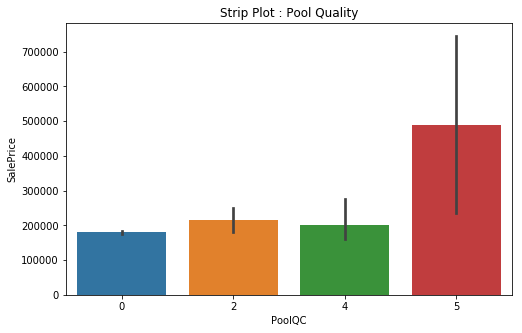

In [21]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('Strip Plot : Pool Quality')
sns.barplot(x = 'PoolQC', y = 'SalePrice', data = df)

#### `MiscFeature`

Data Description

`Elev Elevator
Gar2 2nd Garage (if not described in garage section)
Othr Other
Shed Shed (over 100 SF)
TenC Tennis Court
NA   None`

Since theres no other feature that can cross check if these are true missing values which means the house doesn't have Miscellaneous Features, impute with `None`.

In [22]:
# impute
df['MiscFeature'] = df['MiscFeature'].fillna('None')

In [23]:
# seemingly not ordinal. Convert to categorical dtype
df['MiscFeature'] = df['MiscFeature'].astype('category')

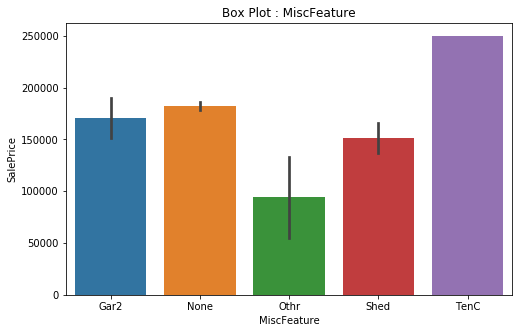

In [24]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('Box Plot : MiscFeature')
sns.barplot(x = 'MiscFeature', y = 'SalePrice', data = df)

#### Alley

Data Description

`Grvl Gravel
Pave  Paved
NA    No alley access`

There are `2721` missing NAs. Data description notes that it means there is no alley.

In [25]:
# impute
df['Alley'] = df['Alley'].fillna('None')

# not ordinal, convert to categorical dtype
df['Alley'] = df['Alley'].astype('category')

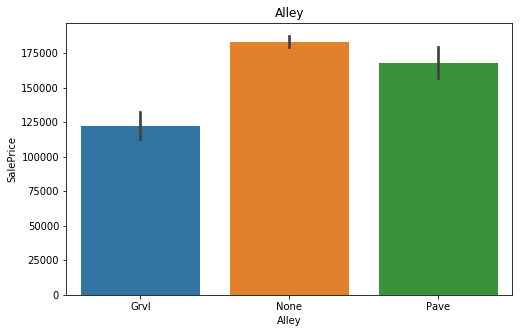

In [26]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('Alley')
sns.barplot(x = 'Alley', y = 'SalePrice', data = df)

#### `Fence`

Data Description

`GdPrv    Good Privacy
MnPrv    Minimum Privacy
GdWo Good Wood
MnWw Minimum Wood/Wire
NA   No Fence`

In [27]:
# impute
df['Fence'] = df['Fence'].fillna('None')

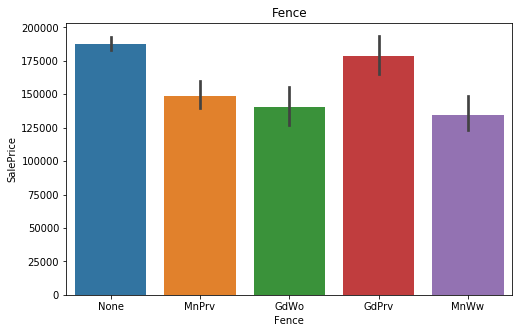

In [28]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('Fence')
sns.barplot(x = 'Fence', y = 'SalePrice', data = df)

In [29]:
# Since Fence boxplot shows no significant relation to SalePrice, not ordinal
df['Fence'] = df['Fence'].astype('category')

#### `FireplaceQu`

`Ex   Excellent - Exceptional Masonry Fireplace
Gd   Good - Masonry Fireplace in main level
TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
Fa   Fair - Prefabricated Fireplace in basement
Po   Poor - Ben Franklin Stove
NA   No Fireplace`

In [30]:
# cross check
df[(df['FireplaceQu'].isnull()) & (df['Fireplaces'] > 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [31]:
# ordinal encode
df['FireplaceQu'] = df['FireplaceQu'].replace(qual_enc).astype('int64')

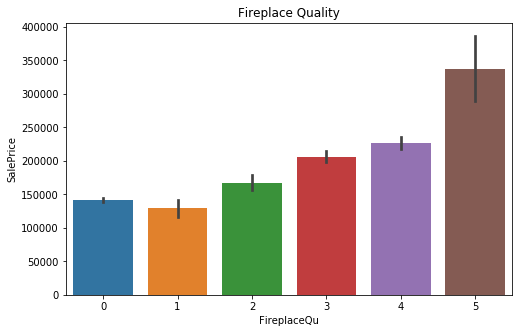

In [32]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('Fireplace Quality')
sns.barplot(x = 'FireplaceQu', y = 'SalePrice', data = df)

#### Lot Features

`LotFrontage`: Linear feet of street connected to property

**486** NAs. After digging into the data variables, it seems imputing by `Neighborhood` and their relative `LotFrontage` values would be best.

`LotArea`: Lot size in square feet

`LotShape`: General shape of property

- Reg Regular
- IR1 Slightly irregular
- IR2 Moderately Irregular
- IR3 Irregular

In [33]:
# impute by median of neighborhood

df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

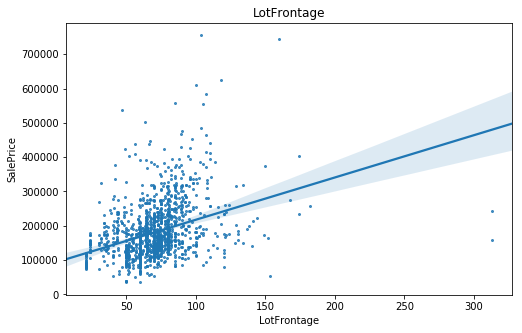

In [34]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('LotFrontage')
sns.regplot(x = 'LotFrontage', y = 'SalePrice', data = df, scatter_kws = {'s':4})

In [35]:
# check outliers
df[((df['LotFrontage'] > 300) & (df['SalePrice'] < 300000))
   | ((df['LotFrontage'] < 200) & (df['SalePrice'] > 700000))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,0,1,2007,WD,Normal,755000.0
934,20,RL,313.0,27650,Pave,None,IR2,HLS,AllPub,Inside,...,0,0,None,None,0,11,2008,WD,Normal,242000.0
1182,60,RL,160.0,15623,Pave,None,IR1,Lvl,AllPub,Corner,...,555,5,MnPrv,None,0,7,2007,WD,Abnorml,745000.0
1298,60,RL,313.0,63887,Pave,None,IR3,Bnk,AllPub,Corner,...,480,4,None,None,0,1,2008,New,Partial,160000.0


From earlier I remember seeing observation **1298** when checking `GrLivArea`. This value seems like a problem and should be noted.

In [36]:
# encode LotShape

df['LotShape'] = df['LotShape'].replace({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

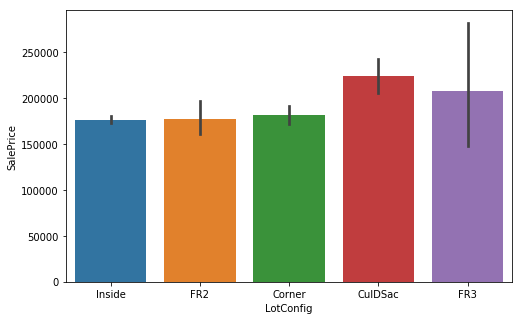

In [37]:
f, ax = plt.subplots(figsize = (8,5))

sns.barplot(x = 'LotConfig', y = 'SalePrice', data = df)

In [38]:
# not ordinal convert to categorical

df['LotConfig'] = df['LotConfig'].astype('category')

#### Garage Features

Data Descriptions

`GarageYrBlt`

> Year garage was built

`GarageFinish`

- Fin Finished
- RFn Rough Finished
- Unf Unfinished
- NA No Garage

`GarageQual`

- Ex Excellent
- Gd Good
- TA Typical/Average
- Fa Fair
- Po Poor
- NA No Garage

`GarageCond`

- Ex Excellent
- Gd Good
- TA Typical/Average
- Fa Fair
- Po Poor
- NA No Garage

`GarageType`

- 2Types More than one type of garage
- Attchd Attached to home
- Basment Basement Garage
- BuiltIn Built-In (Garage part of house - typically has room above garage

`GarageCars`

> Size of garage in car capacity

`GarageArea`

>Size of garage in square feet

In [39]:
# GarageYrBlt can be imputed with YearBuilt
df.loc[df['GarageYrBlt'].isnull(), 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isnull(), 'YearBuilt']

In [40]:
# Cross check [GarageFinish, GarageQual, GarageCond] w/ GarageType
df[(df['GarageType'].notnull()) & (df['GarageFinish'].isnull())][['GarageCars', 'GarageArea',
                                                                 'GarageType', 'GarageCond',
                                                                 'GarageQual', 'GarageFinish']]

,GarageCars,GarageArea,GarageType,GarageCond,GarageQual,GarageFinish
2126,1.0,360.0,Detchd,NaN,NaN,NaN
2576,NaN,NaN,Detchd,NaN,NaN,NaN


In [41]:
# impute modes for 2126

df.loc[2126, 'GarageCond'] = df['GarageCond'].mode()[0]
df.loc[2126, 'GarageQual'] = df['GarageQual'].mode()[0]
df.loc[2126, 'GarageFinish'] = df['GarageFinish'].mode()[0]

In [42]:
# 2576 has NAs for everything else GarageType must be an error
# impute Garage varibales for observation 2576

df.loc[2576, 'GarageCars'] = 0
df.loc[2576, 'GarageArea'] = 0
df.loc[2576, 'GarageType'] = np.nan

In [43]:
# impute GarageType

df['GarageType'] = df['GarageType'].fillna('None')

In [44]:
# convert GarageType
df['GarageType'] = df['GarageType'].astype('category')

In [45]:
# encode GarageFinish , seems ordinal

df['GarageFinish'] = df['GarageFinish'].replace({'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0})

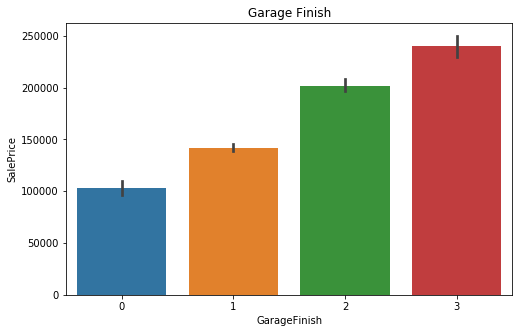

In [46]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('Garage Finish')
sns.barplot(x = 'GarageFinish', y = 'SalePrice', data = df)

In [47]:
# encode GarageQual, seems ordinal

df['GarageQual'] = df['GarageQual'].replace(qual_enc)

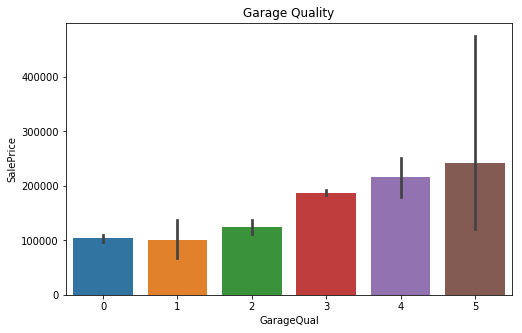

In [48]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('Garage Quality')
sns.barplot(x = 'GarageQual', y = 'SalePrice', data = df)

In [49]:
# encode GarageCond, seems ordinal

df['GarageCond'] = df['GarageCond'].replace(qual_enc)

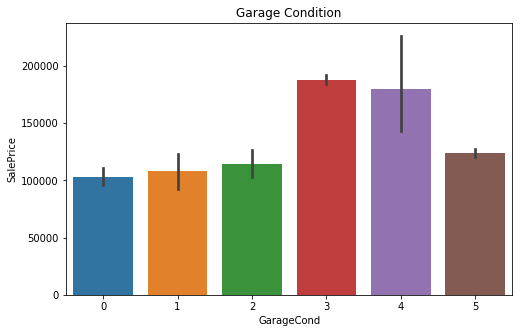

In [50]:
f, ax = plt.subplots(figsize = (8, 5))
plt.title('Garage Condition')
sns.barplot(x = 'GarageCond', y = 'SalePrice', data = df)

`GarageQual` and `GarageCond` don't seem very related to `SalePrice`. Candidates to change to categorical or removal.

#### Basement Features

Data Description

`BsmtCond`: Evaluates the general condition of the basement

- Ex Excellent
- Gd Good
- TA Typical - slight dampness allowed
- Fa Fair - dampness or some cracking or settling
- Po Poor - Severe cracking, settling, or wetness
- NA No Basement

`BsmtExposure`: Refers to walkout or garden level walls

- Gd Good Exposure
- Av Average Exposure (split levels or foyers typically score average or above)
- Mn Mimimum Exposure
- No No Exposure
- NA No Basement

`BsmtQual`: Evaluates the height of the basement

- Ex Excellent (100+ inches)
- Gd Good (90-99 inches)
- TA Typical (80-89 inches)
- Fa Fair (70-79 inches)
- Po Poor (<70 inches
- NA No Basement

`BsmtFinType2`: Rating of basement finished area (if multiple types)

- GLQ Good Living Quarters
- ALQ Average Living Quarters
- BLQ Below Average Living Quarters
- Rec Average Rec Room
- LwQ Low Quality
- Unf Unfinshed
- NA No Basement

`BsmtFinType1`: Rating of basement finished area

- GLQ Good Living Quarters
- ALQ Average Living Quarters
- BLQ Below Average Living Quarters
- Rec Average Rec Room
- LwQ Low Quality
- Unf Unfinshed
- NA No Basement

`BsmtFullBath`: Basement full bathrooms

`BsmtHalfBath`: Basement half bathrooms

`BsmtFinSF1`: Type 1 finished square feet

`BsmtFinSF2`: Type 2 finished square feet

`BsmtUnfSF`: Unfinished square feet of basement area

`TotalBsmtSF`: Total square feet of basement area

In [51]:
#cross check BsmtFinType1 (79 NAs) with BsmtCond, BsmtExposure, BsmtQual, BsmtFinType2
df[df['BsmtFinType1'].notnull() & (df['BsmtCond'].isnull() | df['BsmtExposure'].isnull() |
  df['BsmtQual'].isnull() | df['BsmtFinType2'].isnull())][['BsmtFinType1', 'BsmtCond', 'BsmtExposure', 'BsmtQual', 
                                                          'BsmtFinType2']]

,BsmtFinType1,BsmtCond,BsmtExposure,BsmtQual,BsmtFinType2
332,GLQ,TA,No,Gd,NaN
948,Unf,TA,NaN,Gd,Unf
1487,Unf,TA,NaN,Gd,Unf
2040,GLQ,NaN,Mn,Gd,Rec
2185,BLQ,NaN,No,TA,Unf
2217,Unf,Fa,No,NaN,Unf
2218,Unf,TA,No,NaN,Unf
2348,Unf,TA,NaN,Gd,Unf
2524,ALQ,NaN,Av,TA,Unf


In [52]:
# impute for these observations with basements
df.loc[332, 'BsmtFinType2'] = df['BsmtFinType2'].mode()[0]
df.loc[[948, 1487, 2348], 'BsmtExposure'] = df['BsmtExposure'].mode()[0]
df.loc[[2040, 2185, 2524], 'BsmtCond'] = df['BsmtCond'].mode()[0]
df.loc[[2217, 2218], 'BsmtQual'] = df['BsmtQual'].mode()[0]

In [53]:
# the rest don't have basements
# encode

df['BsmtQual'] = df['BsmtQual'].replace(qual_enc)
df['BsmtCond'] = df['BsmtCond'].replace(qual_enc)
df['BsmtExposure'] = df['BsmtExposure'].replace({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0})
df['BsmtFinType1'] = df['BsmtFinType1'].replace(
    {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0})
df['BsmtFinType2'] = df['BsmtFinType2'].replace(
    {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0})

In [54]:
# Cross check BsmtFullBath, BsmtHalfBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
#with BsmtQual

df[df['BsmtFullBath'].isnull()][['BsmtQual', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
                                'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtQual,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2120,0,NaN,NaN,NaN,NaN,NaN,NaN
2188,0,NaN,NaN,0.0,0.0,0.0,0.0


In [55]:
# impute rest of NAs for basement features

df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)

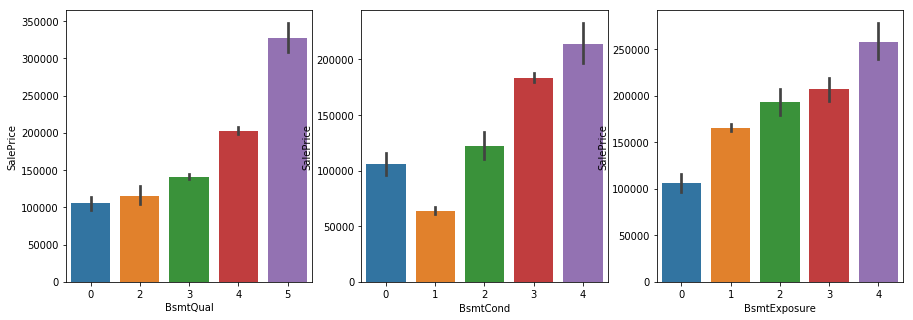

In [56]:
f, ax = plt.subplots(ncols=3, figsize = (15,5))

sns.barplot(x = 'BsmtQual', y = 'SalePrice', data = df, ax = ax[0])
sns.barplot(x = 'BsmtCond', y = 'SalePrice', data = df, ax = ax[1])
sns.barplot(x = 'BsmtExposure', y = 'SalePrice', data = df, ax = ax[2])

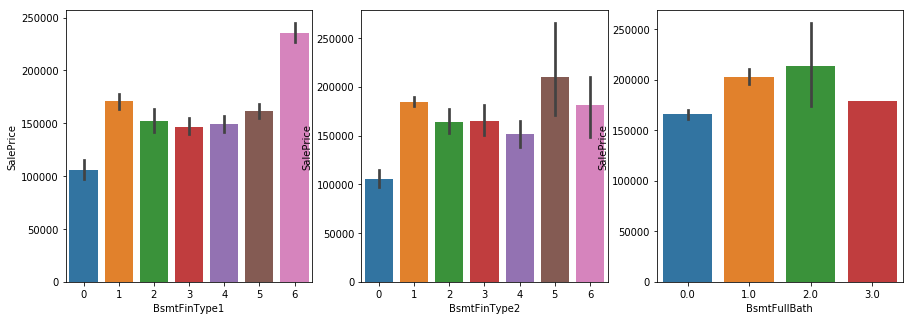

In [57]:
f, ax = plt.subplots(ncols=3, figsize = (15,5))

sns.barplot(x = 'BsmtFinType1', y = 'SalePrice', data = df, ax = ax[0])
sns.barplot(x = 'BsmtFinType2', y = 'SalePrice', data = df, ax = ax[1])
sns.barplot(x = 'BsmtFullBath', y = 'SalePrice', data = df, ax = ax[2])

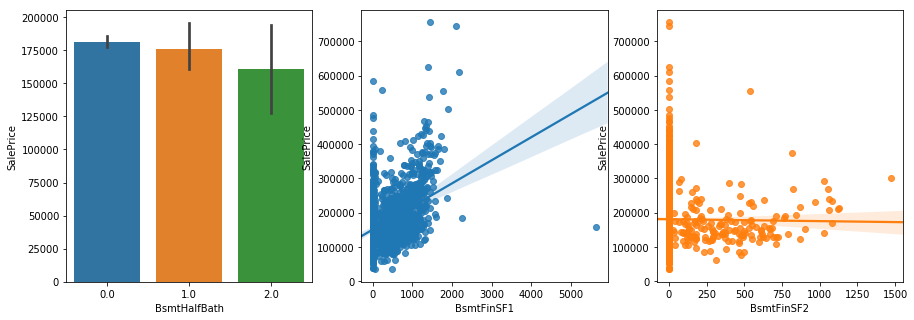

In [58]:
f, ax = plt.subplots(ncols=3, figsize = (15,5))

sns.barplot(x = 'BsmtHalfBath', y = 'SalePrice', data = df, ax = ax[0])
sns.regplot(x = 'BsmtFinSF1', y = 'SalePrice', data = df, ax = ax[1])
sns.regplot(x = 'BsmtFinSF2', y = 'SalePrice', data = df, ax = ax[2])

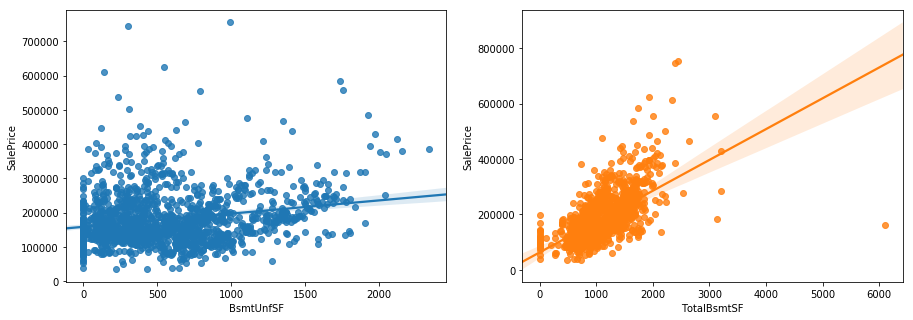

In [59]:
f, ax = plt.subplots(ncols=2, figsize = (15,5))

sns.regplot(x = 'BsmtUnfSF', y = 'SalePrice', data = df, ax = ax[0])
sns.regplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df, ax = ax[1])

In [60]:
df[(df['TotalBsmtSF'] >= 6000) & (df['SalePrice'] < 300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,60,RL,313.0,63887,Pave,None,0,Bnk,AllPub,Corner,...,480,4,None,None,0,1,2008,New,Partial,160000.0


#### Masonry Features

`MasVnrType`: Masonry veneer type

- BrkCmn Brick Common
- BrkFace Brick Face
- CBlock Cinder Block
- None None
- Stone Stone

`MasVnrArea`: Masonry veneer area in square feet

In [61]:
# cross check

df[df['MasVnrType'].isnull() & df['MasVnrArea'].notnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
2610,NaN,198.0


In [62]:
df.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [63]:
# impute observation 2610 with 2nd highest mode
df.loc[2610, 'MasVnrType'] = 'BrkFace'

In [64]:
# impute MasVnrArea

df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [65]:
# encode MasVnrType

df['MasVnrType'] = df['MasVnrType'].replace({'None': 0, np.nan: 0, 'BrkCmn': 0, 
                                             'BrkFace': 1, 'Stone': 2})

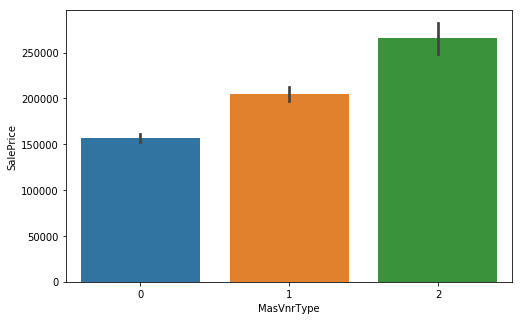

In [66]:
f, ax = plt.subplots(figsize = (8,5))

sns.barplot(x = 'MasVnrType', y = 'SalePrice', data = df)

#### MSZoning

`MSZoning`: Identifies the general zoning classification of the sale.

- A Agriculture
- C Commercial
- FV Floating Village Residential
- I Industrial
- RH Residential High Density
- RL Residential Low Density
- RP Residential Low Density Park
- RM Residential Medium Density

In [67]:
# impute mode

df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [68]:
# convert

df['MSZoning'] = df['MSZoning'].astype('category')

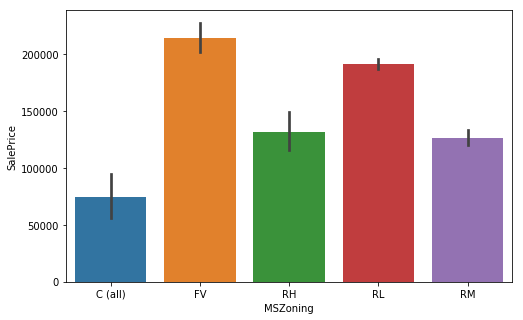

In [69]:
f, ax = plt.subplots(figsize = (8,5))

sns.barplot(x = 'MSZoning', y = 'SalePrice', data = df)

#### Utilities

`Utilities`: Type of utilities available

- AllPub All public Utilities (E,G,W,& S)
- NoSewr Electricity, Gas, and Water (Septic Tank)
- NoSeWa Electricity and Gas Only
- ELO Electricity only

In [70]:
# impute mode

df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

In [71]:
df['Utilities'].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [72]:
# all but 1 is AllPub. Drop variable

df = df.drop('Utilities', axis = 1)

#### Functional

`Functional`: Home functionality (Assume typical unless deductions are warranted)

- Typ Typical Functionality
- Min1 Minor Deductions 1
- Min2 Minor Deductions 2
- Mod Moderate Deductions
- Maj1 Major Deductions 1
- Maj2 Major Deductions 2
- Sev Severely Damaged
- Sal Salvage only

In [73]:
# impute mode

df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])

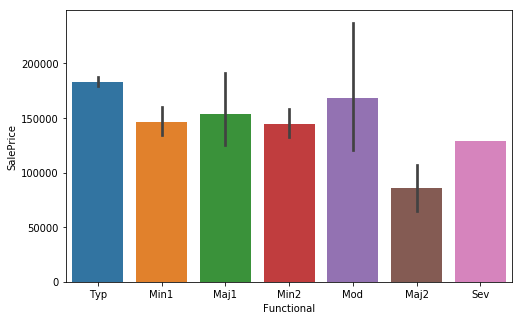

In [74]:
f, ax = plt.subplots(figsize = (8,5))

sns.barplot(x = 'Functional', y = 'SalePrice', data = df)

In [75]:
# encode

df['Functional'] = df['Functional'].replace({'Sal': 0, 'Sev': 1, 'Maj2': 2, 'Maj1': 2, 'Mod': 4,
                                            'Min2': 5, 'Min1': 6, 'Typ': 7})

#### Exterior Features

`Exterior1st`: Exterior covering on house

- AsbShng Asbestos Shingles
- AsphShn Asphalt Shingles
- BrkComm Brick Common
- BrkFace Brick Face
- CBlock Cinder Block
- CemntBd Cement Board
- HdBoard Hard Board
- ImStucc Imitation Stucco
- MetalSd Metal Siding
- Other Other
- Plywood Plywood
- PreCast PreCast
- Stone Stone
- Stucco Stucco
- VinylSd Vinyl Siding
- Wd Sdng Wood Siding
- WdShing Wood Shingles

`Exterior2nd`: Exterior covering on house (if more than one material)

- AsbShng Asbestos Shingles
- AsphShn Asphalt Shingles
- BrkComm Brick Common
- BrkFace Brick Face
- CBlock Cinder Block
- CemntBd Cement Board
- HdBoard Hard Board
- ImStucc Imitation Stucco
- MetalSd Metal Siding
- Other Other
- Plywood Plywood
- PreCast PreCast
- Stone Stone
- Stucco Stucco
- VinylSd Vinyl Siding
- Wd Sdng Wood Siding
- WdShing Wood Shingles

In [76]:
# impute mode for both

df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [77]:
# convert to factor

df['Exterior1st'] = df['Exterior1st'].astype('category')
df['Exterior2nd'] = df['Exterior2nd'].astype('category')

In [78]:
# encode other exterior variables

df['ExterQual'] = df['ExterQual'].replace(qual_enc).astype('int64')
df['ExterCond'] = df['ExterCond'].replace(qual_enc).astype('int64')

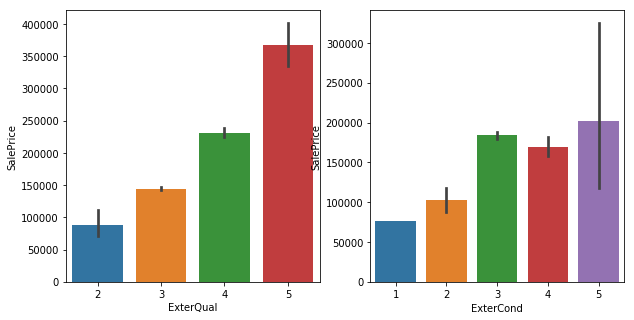

In [79]:
f, ax = plt.subplots(figsize = (10,5), ncols = 2)

sns.barplot(x = 'ExterQual', y = 'SalePrice', data = df, ax = ax[0])
sns.barplot(x = 'ExterCond', y = 'SalePrice', data = df, ax = ax[1])

#### Electrical

`Electrical`: Electrical system

- SBrkr Standard Circuit Breakers & Romex
- FuseA Fuse Box over 60 AMP and all Romex wiring (Average)
- FuseF 60 AMP Fuse Box and mostly Romex wiring (Fair)
- FuseP 60 AMP Fuse Box and mostly knob & tube wiring (poor)
- Mix Mixed

In [80]:
# impute mode

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [81]:
# convert
df['Electrical'] = df['Electrical'].astype('category')

#### Kitchen Features

`Kitchen`: Kitchens above grade

`KitchenQual`: Kitchen quality

- Ex Excellent
- Gd Good
- TA Typical/Average
- Fa Fair
- Po Poor

In [82]:
# impute mode

df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [83]:
# encode

df['KitchenQual'] = df['KitchenQual'].replace(qual_enc).astype('int64')

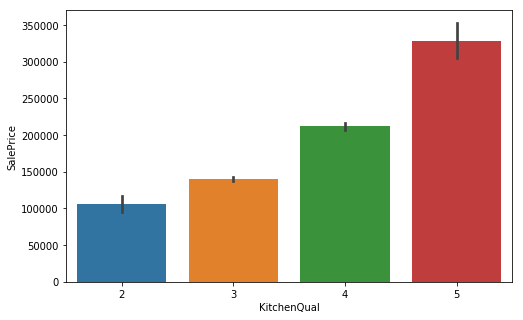

In [84]:
f, ax = plt.subplots(figsize = (8,5))

sns.barplot(x = 'KitchenQual', y = 'SalePrice', data = df)

#### Sale Features

`SaleType`: Type of sale

- WD Warranty Deed - Conventional
- CWD Warranty Deed - Cash
- VWD Warranty Deed - VA Loan
- New Home just constructed and sold
- COD Court Officer Deed/Estate
- Con Contract 15% Down payment regular terms
- ConLw Contract Low Down payment and low interest
- ConLI Contract Low Interest
- ConLD Contract Low Down
- Oth Other

`SaleCondition`: Condition of sale

- Normal Normal Sale
- Abnorml Abnormal Sale - trade, foreclosure, short sale
- AdjLand Adjoining Land Purchase
- Alloca Allocation - two linked properties with separate deeds, typically condo with a garage unit
- Family Sale between family members
- Partial Home was not completed when last assessed (associated with New Homes)

In [85]:
# impute mode

df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])

In [86]:
# convert features

df['SaleType'] = df['SaleType'].astype('category')
df['SaleCondition'] = df['SaleCondition'].astype('category')

In [87]:
check_missing(df)

[('SalePrice', 1459)]

In [88]:
df.columns[df.dtypes == 'object']

Index(['Street', 'LandContour', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'PavedDrive'],
      dtype='object')

In [89]:
print('There are', len(df.columns[df.dtypes == 'object']), 'features to encode')

There are 15 features to encode


#### Foundation

`Foundation`: Type of foundation

- BrkTil Brick & Tile
- CBlock Cinder Block
- PConc Poured Contrete
- Slab Slab
- Stone Stone
- Wood Wood

In [90]:
# convert

df['Foundation'] = df['Foundation'].astype('category')

#### Heating and AirCon

`Heating`: Type of heating

- Floor Floor Furnace
- GasA Gas forced warm air furnace
- GasW Gas hot water or steam heat
- Grav Gravity furnace
- OthW Hot water or steam heat other than gas
- Wall Wall furnace

`HeatingQC`: Heating quality and condition

- Ex Excellent
- Gd Good
- TA Average/Typical
- Fa Fair
- Po Poor

`CentralAir`: Central air conditioning

- N No
- Y Yes

In [91]:
# convert Heating

df['Heating'] = df['Heating'].astype('category')

In [92]:
# encode HeatingQC

df['HeatingQC'] = df['HeatingQC'].replace(qual_enc).astype('int64')

In [93]:
# encode CentrailAir
df['CentralAir'] = df['CentralAir'].replace({'N':0, 'Y':1})

#### Roof Featrues

`RoofStyle`: Type of roof

- Flat Flat
- Gable Gable
- Gambrel Gabrel (Barn)
- Hip Hip
- Mansard Mansard
- Shed Shed

`RoofMatl`: Roof material

- ClyTile Clay or Tile
- CompShg Standard (Composite) Shingle
- Membran Membrane
- Metal Metal
- Roll Roll
- Tar&Grv Gravel & Tar
- WdShake Wood Shakes
- WdShngl Wood Shingles

In [94]:
# convert

df['RoofStyle'] = df['RoofStyle'].astype('category')
df['RoofMatl'] = df['RoofMatl'].astype('category')

#### Land features

`LandContour`: Flatness of the property

- Lvl Near Flat/Level
- Bnk Banked - Quick and significant rise from street grade to building
- HLS Hillside - Significant slope from side to side
- Low Depression

`LandSlope`: Slope of property

- Gtl Gentle slope
- Mod Moderate Slope
- Sev Severe Slope

In [95]:
# convert LandContour

df['LandContour'] = df['LandContour'].astype('category')

In [96]:
# encode LandSlope

df['LandSlope'] = df['LandSlope'].replace({'Sev': 0, 'Mod': 1, 'Gtl': 2})

#### Dwelling

`BldgType`: Type of dwelling

- 1Fam Single-family Detached
- 2FmCon Two-family Conversion; originally built as one-family dwelling
- Duplx Duplex
- TwnhsE Townhouse End Unit
- TwnhsI Townhouse Inside Unit

`HouseStyle`: Style of dwelling

- 1Story One story
- 1.5Fin One and one-half story: 2nd level finished
- 1.5Unf One and one-half story: 2nd level unfinished
- 2Story Two story
- 2.5Fin Two and one-half story: 2nd level finished
- 2.5Unf Two and one-half story: 2nd level unfinished
- SFoyer Split Foyer
- SLvl Split Level

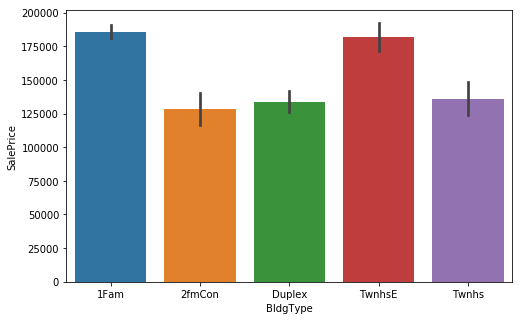

In [97]:
f, ax = plt.subplots(figsize = (8,5))

sns.barplot(x = 'BldgType', y = 'SalePrice', data = df)

In [98]:
# not ordinal convert
df['BldgType'] = df['BldgType'].astype('category')
df['HouseStyle'] = df['HouseStyle'].astype('category')

#### Pavement and Street features

`PavedDrive`: Paved driveway

- Y Paved
- P Partial Pavement
- N Dirt/Gravel

`Street`: Type of road access to property

- Grvl Gravel
- Pave Paved

In [99]:
# encode

df['PavedDrive'] = df['PavedDrive'].replace({'N': 0, 'P': 1, 'Y': 2})
df['Street'] = df['Street'].replace({'Grvl': 0, 'Pave': 1})

#### Neighborhood and Conditions

`Neighborhood`: Physical locations within Ames city limits

- Blmngtn Bloomington Heights
- Blueste Bluestem
- BrDale Briardale
- BrkSide Brookside
- ClearCr Clear Creek
- CollgCr College Creek
- Crawfor Crawford
- Edwards Edwards
- Gilbert Gilbert
- IDOTRR Iowa DOT and Rail Road
- MeadowV Meadow Village
- Mitchel Mitchell
- Names North Ames
- NoRidge Northridge
- NPkVill Northpark Villa
- NridgHt Northridge Heights
- NWAmes Northwest Ames
- OldTown Old Town
- SWISU South & West of Iowa State University
- Sawyer Sawyer
- SawyerW Sawyer West
- Somerst Somerset
- StoneBr Stone Brook
- Timber Timberland
- Veenker Veenker

`Condition1`: Proximity to various conditions

- Artery Adjacent to arterial street
- Feedr Adjacent to feeder street
- Norm Normal
- RRNn Within 200' of North-South Railroad
- RRAn Adjacent to North-South Railroad
- PosN Near positive off-site feature--park, greenbelt, etc.
- PosA Adjacent to postive off-site feature
- RRNe Within 200' of East-West Railroad
- RRAe Adjacent to East-West Railroad

`Condition2`: Proximity to various conditions (if more than one is present)

- Artery Adjacent to arterial street
- Feedr Adjacent to feeder street
- Norm Normal
- RRNn Within 200' of North-South Railroad
- RRAn Adjacent to North-South Railroad
- PosN Near positive off-site feature--park, greenbelt, etc.
- PosA Adjacent to postive off-site feature
- RRNe Within 200' of East-West Railroad
- RRAe Adjacent to East-West Railroad

In [100]:
# convert

df['Neighborhood'] = df['Neighborhood'].astype('category')
df['Condition1'] = df['Condition1'].astype('category')
df['Condition2'] = df['Condition2'].astype('category')

#### Numeric features convert

Some numeric features are actually categorical

In [101]:
df['MoSold'] = df['MoSold'].astype('category')
df['MSSUBClass'] = df['MSSubClass'].astype('category')

In [102]:
print('There are',len(df.columns[df.dtypes == 'category']),'categorical features, and', 
      len(df.columns[df.dtypes != 'category']), 'numeric features.')

There are 23 categorical features, and 57 numeric features.


### More EDA

In [103]:
# split df back into train & test
train_data = df[:len(train_data)]
test_data = df[len(train_data):]

#remove empty SalePrice column from test
test_data = test_data.drop('SalePrice', axis = 1)

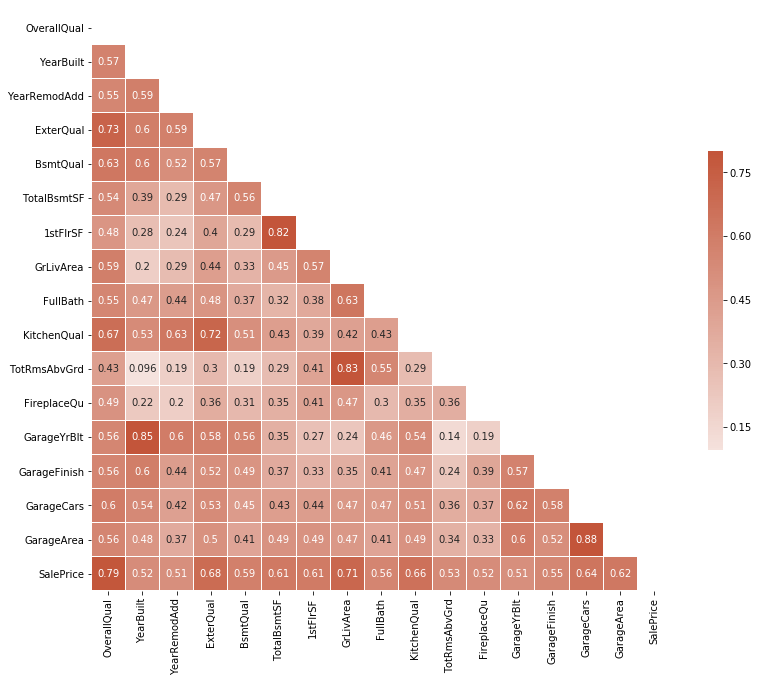

In [104]:
# check correlation again

corr = train_data.corr()
# create corr df with only high correlations
corr_sig = corr[abs(corr['SalePrice']) > .5]
# remove columns that aren't in row index
corr_sig = corr_sig[corr_sig.index]

# generate mask for upper triangle
mask = np.zeros_like(corr_sig, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# set up plt figure
f, ax = plt.subplots(figsize = (13, 11))

# generate a custom divergin colormap
cmap = sns.diverging_palette(200, 20, as_cmap=True)

# draw heatmap with mask and correct aspect ratiot
sns.heatmap(corr_sig, mask=mask, cmap=cmap, vmax=.8, center=0,
           square=True, linewidths=.01, cbar_kws={"shrink": .5},
           annot=True, annot_kws={'size': 10})

## Feature Engineering

### Total Bathrooms

We saw earlier that `BsmtFullBath` and `BsmtHalfBath` have a weak relation to `SalePrice` but `FullBath` has a strong correlation. Let's take a look at the last bathroom feature `HalfBath`.

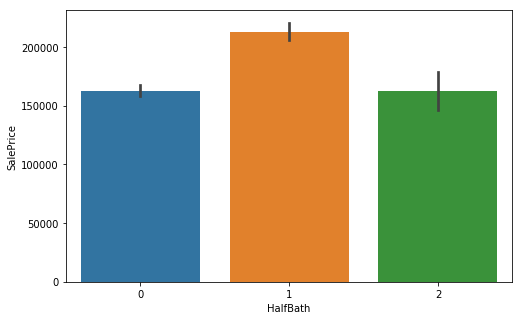

In [105]:
f, ax = plt.subplots(figsize = (8,5))

sns.barplot(x='HalfBath', y = 'SalePrice', data = df)

In [106]:
# create Total Bathrooms feature
df['TotalBath'] = df['FullBath'] + df['BsmtFullBath'] + (0.5*df['HalfBath']) + (0.5*df['BsmtHalfBath'])

# check corr
df['SalePrice'].corr(df['TotalBath'])

0.6317310679319872

### Features from Year variables

This step generates features based on year variables `YearBuilt`, `YearRemodAdd`, and `YrSold`. The idea is to create an `Age` variable that shows how old a house is from when it was built, and a binary varable of if the house was remodeled or not.

In [107]:
# creates feature 0 = not remodeled, 1 = remodeled
df['Remod'] = (df['YearBuilt'] != df['YearRemodAdd']).astype('int')

In [108]:
df['Age'] = df['YrSold'] - df['YearRemodAdd']

In [109]:
df['IsNew'] = (df['YrSold'] == df['YearBuilt']).astype('int')

### Binning Neighborhood



In [110]:
df['SalePrice'].groupby(df['Neighborhood']).mean().sort_values().index

CategoricalIndex(['MeadowV', 'IDOTRR', 'BrDale', 'BrkSide', 'Edwards',
                  'OldTown', 'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes',
                  'Mitchel', 'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn',
                  'CollgCr', 'Crawfor', 'ClearCr', 'Somerst', 'Veenker',
                  'Timber', 'StoneBr', 'NridgHt', 'NoRidge'],
                 categories=['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', ...], ordered=False, name='Neighborhood', dtype='category')

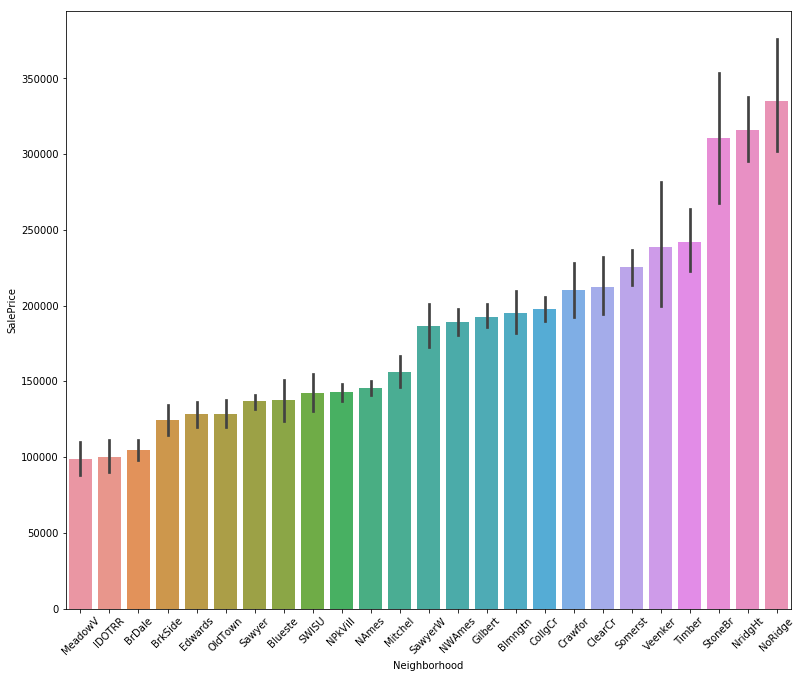

In [111]:
f, ax = plt.subplots(figsize = (13,11))
ax.set_xticklabels(labels = df['Neighborhood'].index, rotation = 45)
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = df, 
            order = df['SalePrice'].groupby(df['Neighborhood']).mean().sort_values().index)

In [112]:
# encode neighborhood

df['NeighGroup'] = df['Neighborhood'].astype(str)

df.loc[df['NeighGroup'].isin(['MeadowV', 'IDOTRR', 'BrDale']), 'NeighGroup'] = 0
df.loc[df['NeighGroup'].isin(['BrkSide', 'Edwards',
                  'OldTown', 'Sawyer', 'Blueste', 'SWISU', 'NPkVill', 'NAmes',
                  'Mitchel', 'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn',
                  'CollgCr', 'Crawfor', 'ClearCr', 'Somerst', 'Veenker',
                  'Timber']), 'NeighGroup'] = 1
df.loc[df['NeighGroup'].isin(['StoneBr', 'NridgHt', 'NoRidge']), 'NeighGroup'] = 2

### Total Square Feet

In [113]:
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']

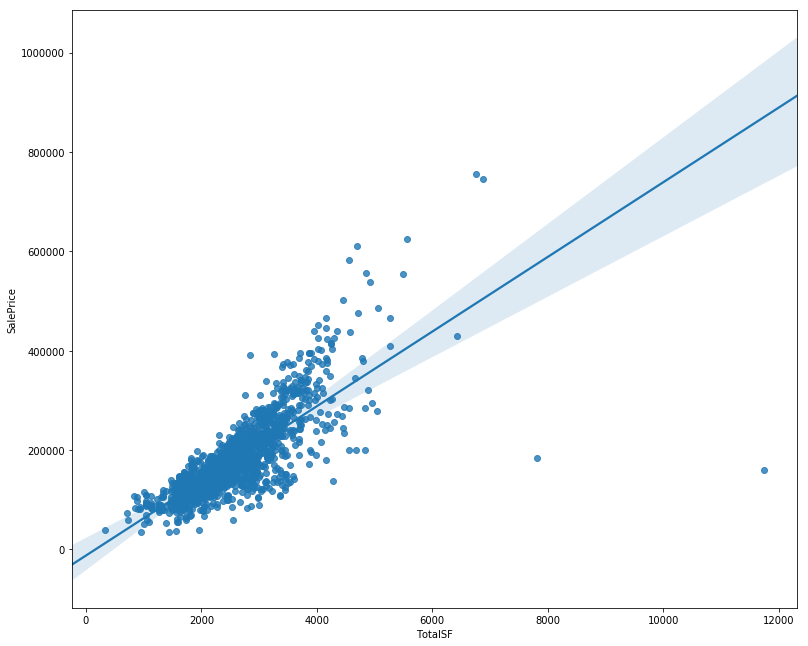

In [114]:
f, ax = plt.subplots(figsize = (13,11))

sns.regplot(x = 'TotalSF', y = 'SalePrice', data = df)

In [115]:
df['SalePrice'].corr(df['TotalSF'])

0.7789588289942263

In [116]:
# outliers

df[(df['TotalSF'] > 7000) & (df['SalePrice'] < 200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,SaleType,SaleCondition,SalePrice,MSSUBClass,TotalBath,Remod,Age,IsNew,NeighGroup,TotalSF
523,60,RL,130.0,40094,1,None,2,Bnk,Inside,2,...,New,Partial,184750.0,60,4.5,1,-1,1,1,7814.0
1298,60,RL,313.0,63887,1,None,0,Bnk,Corner,2,...,New,Partial,160000.0,60,4.5,0,0,1,1,11752.0


In [117]:
# check corr without outlirs
bad_data = df.index.isin([523,1298])

df[~bad_data]['SalePrice'].corr(df['TotalSF'])

0.8290419781065507

### Consolidating Porch Features

In [118]:
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

In [119]:
df['SalePrice'].corr(df['TotalPorchSF'])

0.19573894078383539

## Modeling

In [120]:
# drop highly correlated variables

df = df.drop(['YearRemodAdd', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'TotalBsmtSF', 
              'TotRmsAbvGrd' , 'BsmtFinSF1'], axis = 1)

In [121]:
# drop outliers

df = df.drop(df.index[[523,1298]])

In [122]:
# split data frame by dtypes
df_num = df[df.columns[df.dtypes != 'category']]
df_cat = df[df.columns[df.dtypes == 'category']]

In [123]:
# identify columns with skew
skew = df_num.skew()

#show top 20 features with most skew
abs(skew).sort_values(ascending = False).head(20)

MiscVal          21.950962
PoolArea         17.697766
PoolQC           17.547454
Street           15.502729
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
Functional        5.226588
LandSlope         4.975813
IsNew             4.759378
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
BsmtCond          3.628962
CentralAir        3.459334
GarageQual        3.273292
BsmtFinType2      3.155053
PavedDrive        2.979273
dtype: float64

In [124]:
skew_cols = skew[abs(skew) > 0.8].index

In [125]:
# transform log + 1
df_num[skew_cols] = df_num[skew_cols].apply(np.log1p, axis = 1)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [166]:
abs(df_num.skew()).sort_values(ascending = False)

PoolQC           16.289502
PoolArea         15.631314
Street           15.502729
3SsnPorch         8.826656
LowQualFinSF      8.559041
Functional        6.359193
LandSlope         6.123972
MiscVal           5.214687
BsmtCond          4.964737
IsNew             4.759378
BsmtHalfBath      3.775149
GarageQual        3.671704
KitchenAbvGr      3.520694
BsmtQual          3.491937
CentralAir        3.459334
PavedDrive        3.080474
ScreenPorch       2.946085
BsmtFinSF2        2.462526
LotShape          2.375701
BsmtUnfSF         2.155250
EnclosedPorch     1.960960
BsmtFinType2      1.853381
LotFrontage       1.069416
ExterQual         0.783859
Fireplaces        0.725651
MasVnrType        0.713744
HalfBath          0.697024
BsmtFullBath      0.622735
YearBuilt         0.599503
TotalPorchSF      0.571346
OverallCond       0.569607
BsmtExposure      0.568551
HeatingQC         0.549102
MasVnrArea        0.538731
LotArea           0.532920
TotalBath         0.486693
Age               0.449596
K

In [158]:
# one hot encode categorical data

df_dummies = pd.get_dummies(df_cat)

### Removing dummy features

In [127]:
train_data = df_dummies[:len(train_data)-2]
test_data = df_dummies[len(train_data)-2:]

In [159]:
# check if train dummy featres have less than 10 values with 1
train_data.columns[(train_data.sum() < 10)]

Index(['LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_NPkVill',
       'Condition1_PosA', 'Condition1_RRNe', 'Condition1_RRNn',
       'Condition2_Artery', 'Condition2_Feedr', 'Condition2_PosA',
       'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn',
       'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'Exterior2nd_Stone', 'Foundation_Stone',
       'Foundation_Wood', 'Heating_Floor', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'Electrical_FuseP', 'Electrical_Mix',
       'GarageType_2Types', 'GarageType_CarPort', 'MiscFeature_Gar2',
       'MiscFeature_Othr', 'MiscFeature_Te

In [160]:
# drop those features
df_dummies = df_dummies.drop(train_data.columns[train_data.sum() < 10], axis = 1)

In [161]:
df_dummies.shape

(2917, 140)

In [172]:
# combine df_num and df_dummies
new_df = pd.concat([df_num, df_dummies], axis = 1)

In [189]:
# recreate train and test data

train_data = new_df[:1458]
test_data = new_df[1458:]

In [192]:
check_missing(test_data)

[('SalePrice', 1459)]

In [193]:
Y = train_data['SalePrice']

train_data = train_data.drop('SalePrice', axis = 1)
test_data = test_data.drop('SalePrice', axis = 1)

# Lasso

In [197]:
# cross validation
from sklearn.model_selection import cross_val_score
alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10, 30, 100, 300]
scores = []
for a in alphas:
    las = Lasso(alpha = a)
    scores.append(cross_val_score(las, train_data, Y, scoring="neg_mean_squared_error", cv = 10).mean())
scores = pd.DataFrame({'parameter': alphas, 'score': scores})
print(scores.sort_values(by = 'score', ascending = False))

    parameter     score
0       0.001 -0.012942
1       0.003 -0.014773
2       0.010 -0.018350
3       0.030 -0.029670
4       0.100 -0.050443
5       0.300 -0.093498
6       1.000 -0.095637
7       3.000 -0.114435
8      10.000 -0.159837
9      30.000 -0.159837
10    100.000 -0.159837
11    300.000 -0.159837


In [214]:
# lasso regression
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.001)
las.fit(train_data, Y)
res_las = las.predict(test_data)

In [208]:
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(Y, las.predict(train_data)))
print('Lasso model has an RMSE of', RMSE)

Lasso model has an RMSE of 0.10635312146147001


In [210]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)


In [215]:
xgb_reg.fit(train_data, Y)
res_xgb = xgb_reg.predict(test_data)

C:\Anaconda\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Anaconda\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [212]:
RMSE = np.sqrt(mean_squared_error(Y, xgb_reg.predict(train_data)))
print('XGBoost model has an RMSE of', RMSE)

XGBoost model has an RMSE of 0.07979172299430815


In [218]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

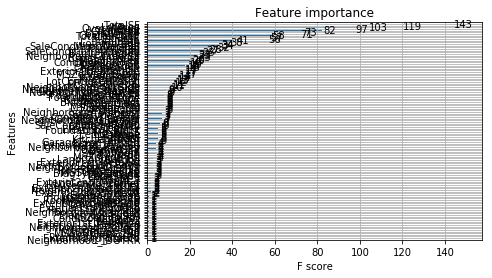

In [225]:
xgb.plot_importance(xgb_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [216]:
# ensemble

res = (res_las*2 + res_xgb)/3

In [217]:
# save predictions
sample_data = pd.read_csv("../data/sample_submission.csv")
sample_data['SalePrice'] = np.exp(res) - 1
sample_data.to_csv('../prediction.csv', index = False)

In [204]:
sample_data.head(5)

,Id,SalePrice
0,1461,113743.924475
1,1462,157157.937374
2,1463,180564.461038
3,1464,202618.910466
4,1465,198016.675057


In [227]:
n_estimators=[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
grid_param = {'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'min_samples_split': min_samples_split,
 'min_samples_leaf': min_samples_leaf,
 'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# the model prior to hyperparameter optimization
RFR=RandomForestRegressor(random_state=1)
from sklearn.model_selection import RandomizedSearchCV
RFR_random = RandomizedSearchCV(estimator = RFR, param_distributions = grid_param, n_iter = 500, cv = 5, verbose=2, random_state=42, n_jobs = -1)
RFR_random.fit(train_data, Y) 
print(RFR_random.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.3min


In [ ]:
# get features importance scores from random forest
from sklearn.ensemble import RandomForestRegressor
rfe = RandomForestRegressor(n_estimators = 500)
rfe.fit(train_data, Y)
imp_score = rfe.feature_importances_
imp_score = pd.DataFrame({'feature': train_data.columns, 'score': imp_score})
print(imp_score.sort_values(by = 'score', ascending = False))